# Data acquisition

In [9]:
import pandas as pd

In [10]:
data = pd.read_excel('D:/orbit_future_academy/Proyek Akhir/Dataset/600 news with valid hoax label.xlsx')

In [11]:
data.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


In [4]:
data.iloc[20:23,:]

,berita,tagging
20,"Siapa yang tidak tahu dengan lele, ikan yang s...",Hoax
21,"Siapa yang tidak tahu dengan lele, ikan yang s...",Hoax
22,"Siapa yang tidak tahu dengan lele, ikan yang s...",Hoax


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   berita   600 non-null    object
 1   tagging  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [13]:
data.groupby('tagging').count()

,berita
tagging,
Hoax,228
Valid,372


In [14]:
label = []
for i in range(len(data)):
    if data.tagging[i] == 'Valid':
        label.append(1)
    else:
        label.append(0)

In [15]:
data['label'] = label
data.head()

,berita,tagging,label
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,1
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,1
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,1
3,Ikan lele merupakan salah satu makanan favorit...,Valid,1
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,1


In [16]:
data = data.reset_index(drop=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   berita   600 non-null    object
 1   tagging  600 non-null    object
 2   label    600 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


# Data exploring

In [123]:
# melihat apakah terdapat missing value
data.isnull().sum()

berita     0
tagging    0
label      0
dtype: int64

# Data preprocessing

## Case folding

In [19]:
import re

In [20]:
def three_sentences(text):
    text = text.split('.')
    text = text[:3]
    text = '. '.join(text).strip()
    text = text + '.'
    return text

In [21]:
data.berita[10]

'Clarias atau yang biasa kita sebut ikan lele belakangan ini menjadi topik perbincangan hangat diseputar dunia kesehatan. Ada yang mengaitkannya dengan ikan yang sepanjang hari hidup di air yang kotor, ada juga yang mengatakan dalam sesuap ikan lele mengandung 3000 sel kanker. Sangat aneh sekali bila berita semacam itu mampu membuat banyak orang menjadi takut. Dalam waktu sekejab menjadi informasi yang viral di dunia maya. Perlu diketahui bahwa menerima informasi dari internet janganlah hanya dengan membaca judulnya saja, tapi baca juga isi artikelnya sampai habis. Memang, judul yang menyesatkan tak jarang membuat orang menjadi penasaran, tak hanya itu saja, rating yang didapat dari sang pembuat judul pun langsung saja meroket. Tapi, para netizen ada juga loh yang ketika melihat judulnya saja sudah langsung percaya kalau ikan lele benar-benar mengandung sel kanker. Bayangkan jika berita tak benar itu kemudian dipercayai dan disebarluaskan oleh banyak pembaca, para pengusaha tambak ikan

In [24]:
print(three_sentences(data.berita[20]),'\n')
print(three_sentences(data.berita[21]))

Siapa yang tidak tahu dengan lele, ikan yang satu ini merupakan favorit bagi banyak orang karena memiliki rasa yang enak dan memiliki tekstur daging yang lembut, namun ternyata lele ikan paling kotor, satu suap mengandung tiga ribu sel kanker.  Benarkah itu? Lele Ikan Paling Kotor, Satu Suap mengandung Tiga Ribu Sel Kanker, Inilah Penjelasannya Lele merupakan salah satu menu makanan favorit dan bahkan di setiap warung makan selalu tersedia menu ini karena harganya yang cukup murah dan enak dapat menjadi daya tarik tersendiri bagi ikan yang satu ini.  Meskipun enak dan murah, Lele ikan paling kotor diantara jenis ikan lainnya yang sering dikonsumsi oleh manusia. 

Siapa yang tidak tahu dengan lele, ikan yang satu ini merupakan favorit bagi banyak orang karena memiliki rasa yang enak dan memiliki tekstur daging yang lembut, namun ternyata lele ikan paling kotor, satu suap mengandung tiga ribu sel kanker.  Benarkah itu? Lele Ikan Paling Kotor, Satu Suap mengandung Tiga Ribu Sel Kanker, In

In [25]:
# membuat fungsi case folding
def casefolding(text):
    text = three_sentences(text)
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+','',text)
    text = re.sub(r'[-+]?[0-9]+','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('\n',' ',text)
    text = text.strip()
    return text

In [26]:
# contoh
raw_text = data.berita[0]
text_casefolding = casefolding(raw_text)

print('original text:',raw_text)
print('')
print('casefolding text:',text_casefolding)

original text: Jakarta, Di jejaring sosial, banyak beredar informasi yang menyebut lele sebagai
ikan paling jorok. Dalam sesuap daging ikan lele, terkandung 3000 sel kanker. Benarkah?
Julukan sebagai ikan paling jorok merujuk pada sifat lele yang doyan mengonsumsi
segala jenis limbah di perairan. Bahkan sebuah artikel yang cukup viral di internet
menyebutkan kotoran manusia juga dijadikan pakan pada sebuah budidaya lele di Kota Haikou, China.
Sementara itu di habitat aslinya, lele atau catfish juga dikenal sebagai spesies ikan yang
sangat tangguh. Ikan ini dilengkapi alat pernapasan tambahan berupa labirin,
sehingga mampu bertahan hidup dalam kondisi perairan berlumpur atau bahkan tercemar.
Agaknya, fakta inilah yang memunculkan dugaan soal akumulasi racun karsinogen (penyebab kanker) di tubuh ikan lele.
Untungnya, ikan lele yang beredar di pasaran bukan berasal dari alam liar.
Lele banyak dibudidayakan di kolam-kolam, yang mestinya bisa dikendalikan agar bebas dari pencemaran.
Pakan y

In [27]:
text_casefolding

'jakarta di jejaring sosial banyak beredar informasi yang menyebut lele sebagai ikan paling jorok  dalam sesuap daging ikan lele terkandung  sel kanker  benarkah julukan sebagai ikan paling jorok merujuk pada sifat lele yang doyan mengonsumsi segala jenis limbah di perairan'

##  Word Normalization

In [130]:
# download corpus akronim
#!python -m wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

In [28]:
key_norm = pd.read_csv('key_norm.csv')
key_norm.head(10)

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi
5,6,acra,acara
6,7,acrany,acaranya
7,8,acrnya,acaranya
8,9,action,aksi
9,10,active,aktif


In [29]:
key_norm.tail()

,_id,singkat,hasil
3715,3716,ywdah,ya sudah
3716,3717,ywdh,ya sudah
3717,3718,ywdhlh,ya sudahlah
3718,3719,ywis,ya sudah
3719,3720,rp,rupiah


In [30]:
# membuat fungsi untuk menormalisasi teks
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Stop removal

In [134]:
#import nltk
#nltk.download('stopwords')

In [31]:
#from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [32]:
stopwords_ind = stopwords.words('indonesian')

In [33]:
len(stopwords_ind)

758

In [34]:
# membuat fungsi untuk remove stopwords
def remove_stopwords(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [36]:
# contoh
raw_text = data.berita[0]
text_casefolding = casefolding(raw_text)
text_clean = remove_stopwords(text_casefolding)

print('original text:',raw_text)
print('')
print('casefolding text:',text_casefolding)
print('')
print('stopwords removal:',text_clean)

original text: Jakarta, Di jejaring sosial, banyak beredar informasi yang menyebut lele sebagai
ikan paling jorok. Dalam sesuap daging ikan lele, terkandung 3000 sel kanker. Benarkah?
Julukan sebagai ikan paling jorok merujuk pada sifat lele yang doyan mengonsumsi
segala jenis limbah di perairan. Bahkan sebuah artikel yang cukup viral di internet
menyebutkan kotoran manusia juga dijadikan pakan pada sebuah budidaya lele di Kota Haikou, China.
Sementara itu di habitat aslinya, lele atau catfish juga dikenal sebagai spesies ikan yang
sangat tangguh. Ikan ini dilengkapi alat pernapasan tambahan berupa labirin,
sehingga mampu bertahan hidup dalam kondisi perairan berlumpur atau bahkan tercemar.
Agaknya, fakta inilah yang memunculkan dugaan soal akumulasi racun karsinogen (penyebab kanker) di tubuh ikan lele.
Untungnya, ikan lele yang beredar di pasaran bukan berasal dari alam liar.
Lele banyak dibudidayakan di kolam-kolam, yang mestinya bisa dikendalikan agar bebas dari pencemaran.
Pakan y

## Stemming

In [141]:
#!python -m pip install Sastrawi

In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [36]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk langkah stemming bahasa indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

## pipline data preprocessing

In [37]:
# membuat fungsi text preprocessing
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [38]:
%%time
data['clean_teks'] = data['berita'].apply(text_preprocessing)

CPU times: total: 4min 41s
Wall time: 4min 44s


In [39]:
data.head()

,berita,tagging,label,clean_teks
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,1,jakarta jejaring sosial edar informasi sebut l...
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,1,isu ikan lele kandung sel kanker jejaring soci...
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,1,nikmat kuliner bahan dasar ikan lele berita su...
3,Ikan lele merupakan salah satu makanan favorit...,Valid,1,ikan lele salah makan favorit indonesia harga ...
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,1,ikan lele bahan makan populer indonesia sebar ...


In [41]:
data.to_excel('D:/orbit_future_academy/Proyek Akhir/clean-data/data_clean.xlsx')

In [46]:
data.duplicated(subset=['clean_teks'],keep='first')

True

In [47]:
data_baru = data.drop_duplicates(subset=['clean_teks'],keep='first')

In [50]:
data_baru.to_excel('D:/orbit_future_academy/Proyek Akhir/clean-data/data_clean_no_duplicate.xlsx')

# Feature engineering

In [750]:
import pandas as pd

In [751]:
data = pd.read_excel('D:/orbit_future_academy/Proyek Akhir/clean-data/data_clean_no_duplicate.xlsx')

In [752]:
data = data.reset_index(drop=True)

In [753]:
data.head()

,Unnamed: 0,berita,tagging,label,clean_teks
0,0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,1,jakarta jejaring sosial edar informasi sebut l...
1,1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,1,isu ikan lele kandung sel kanker jejaring soci...
2,2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,1,nikmat kuliner bahan dasar ikan lele berita su...
3,3,Ikan lele merupakan salah satu makanan favorit...,Valid,1,ikan lele salah makan favorit indonesia harga ...
4,4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,1,ikan lele bahan makan populer indonesia sebar ...


In [754]:
data['label'].unique()

array([1, 0], dtype=int64)

In [755]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  534 non-null    int64 
 1   berita      534 non-null    object
 2   tagging     534 non-null    object
 3   label       534 non-null    int64 
 4   clean_teks  534 non-null    object
dtypes: int64(2), object(3)
memory usage: 21.0+ KB


In [756]:
data.groupby('label').count()

,Unnamed: 0,berita,tagging,clean_teks
label,,,,
0,210,210,210,210
1,324,324,324,324


## Feature extraction

In [757]:
x = data['clean_teks']
y = data['label']

In [758]:
y[:20]

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    0
19    0
Name: label, dtype: int64

In [759]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [760]:
vec_tf_idf = TfidfVectorizer(ngram_range = (1,2))
vec_tf_idf.fit(x)

x_tf_idf = vec_tf_idf.transform(x)

In [761]:
vec_tf_idf.vocabulary_

{'jakarta': 4900,
 'jejaring': 5083,
 'sosial': 11529,
 'edar': 2999,
 'informasi': 4479,
 'sebut': 10875,
 'lele': 6726,
 'ikan': 4272,
 'jorok': 5183,
 'suap': 11731,
 'daging': 2435,
 'kandung': 5546,
 'sel': 10986,
 'kanker': 5593,
 'juluk': 5221,
 'rujuk': 10392,
 'sifat': 11292,
 'doyan': 2890,
 'konsumsi': 6196,
 'jenis': 5130,
 'limbah': 6902,
 'air': 114,
 'jakarta jejaring': 4921,
 'jejaring sosial': 5086,
 'sosial edar': 11544,
 'edar informasi': 3013,
 'informasi sebut': 4524,
 'sebut lele': 10884,
 'lele ikan': 6739,
 'ikan jorok': 4283,
 'jorok suap': 5188,
 'suap daging': 11732,
 'daging ikan': 2436,
 'ikan lele': 4289,
 'lele kandung': 6744,
 'kandung sel': 5567,
 'sel kanker': 10988,
 'kanker juluk': 5610,
 'juluk ikan': 5223,
 'jorok rujuk': 5187,
 'rujuk sifat': 10394,
 'sifat lele': 11294,
 'lele doyan': 6733,
 'doyan konsumsi': 2891,
 'konsumsi jenis': 6202,
 'jenis limbah': 5137,
 'limbah air': 6903,
 'isu': 4757,
 'social': 11492,
 'berita': 1526,
 'mulut': 7844,

In [762]:
len(vec_tf_idf.get_feature_names())

C:\Users\Rizky Adi Pratama\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


13511

In [763]:
x1 = x_tf_idf.toarray()
data_tf_idf = pd.DataFrame(x1,columns=vec_tf_idf.get_feature_names())
data_tf_idf.head(10)

,aa,aa gym,abd,abd salam,abdi,abdi gaji,abdi hasil,abdi men,abdi ringgit,abdul,...,zat narkotika,zat picu,zd,zd net,zhang,zhang rihong,ziarah,ziarah kota,zionisme,zionisme game
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## feature Selection

In [764]:
import numpy as np

In [765]:
x_train = np.array(data_tf_idf)
y_train = np.array(y)

In [766]:
x_train.shape

(534, 13511)

In [767]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [768]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [769]:
chi2_features = SelectKBest(chi2, k=1000)
x_kbest_features = chi2_features.fit_transform(x_train,y_train)

In [770]:
print('original feature number:',x_train.shape[1])
print('reduced feature number:',x_kbest_features.shape[1])

original feature number: 13511
reduced feature number: 1000


In [771]:
data_new = pd.DataFrame(chi2_features.scores_,columns=['nilai'])

In [772]:
data_new.head(10)

,nilai
0,0.057593
1,0.057593
2,0.455111
3,0.455111
4,0.176641
5,0.058880
6,0.031785
7,0.030956
8,0.058880
9,0.641737


In [773]:
features = vec_tf_idf.get_feature_names()
data_new['fitur'] = features

C:\Users\Rizky Adi Pratama\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [774]:
data_new.head(10)

,nilai,fitur
0,0.057593,aa
1,0.057593,aa gym
2,0.455111,abd
3,0.455111,abd salam
4,0.176641,abdi
5,0.058880,abdi gaji
6,0.031785,abdi hasil
7,0.030956,abdi men
8,0.058880,abdi ringgit
9,0.641737,abdul


In [775]:
data_new.sort_values(by='nilai',ascending=False)

,nilai,fitur
7850,2.393766e+00,mulyani
11628,2.286790e+00,sri
11629,2.211432e+00,sri mulyani
13272,2.202031e+00,wakil presiden
7396,1.894806e+00,mati
...,...,...
1938,2.372599e-07,bristles hasil
8453,2.372599e-07,oral
1959,2.372599e-07,buat bristles
7588,2.372599e-07,merek oral


In [776]:
# menampilkan fitur- fitur yang terpilih berdasarkan nilai k tertinggi
mask = chi2_features.get_support()
new_feature = []
for bool,f in zip(mask,features):
    if bool:
        new_feature.append(f)
    selected_feature = new_feature
selected_feature

['abd',
 'abd salam',
 'abdul',
 'abdul salam',
 'abu',
 'abu hurairah',
 'agus',
 'ahmad',
 'ahok',
 'aiib',
 'aiib menkeu',
 'aja ditolelir',
 'akibat',
 'akibat cacat',
 'akibat masjid',
 'akibat mati',
 'aksi bela',
 'aksi daerah',
 'aktif',
 'aku',
 'akun facebook',
 'akupuntur',
 'alas',
 'alat mandi',
 'alat seni',
 'alias hoax',
 'alquran',
 'alquran tugas',
 'alumni kolese',
 'alunalun',
 'alunalun ponorogo',
 'aman siber',
 'amerika serikat',
 'ancam',
 'ancam tutup',
 'anggap bahan',
 'angka',
 'aparat polisi',
 'apple lepas',
 'arah',
 'arah bus',
 'artikel bicara',
 'asal institusi',
 'asal kota',
 'asi',
 'asi infrastructure',
 'atas gugup',
 'atur perintah',
 'atur tutup',
 'awas obat',
 'ayom',
 'babelan',
 'babi',
 'babi periksa',
 'babi temu',
 'badan',
 'badan laksana',
 'badan narkotika',
 'bagai',
 'bahan buat',
 'bahan halal',
 'bahan haram',
 'bahas',
 'bahas naik',
 'bahas senin',
 'bahas sri',
 'balai',
 'ban',
 'ban kabar',
 'bandung',
 'bangkal',
 'bank',
 'b

In [777]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in vec_tf_idf.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features

{'sosial': 11529,
 'edar': 2999,
 'sebut': 10875,
 'rujuk': 10392,
 'jenis': 5130,
 'isu': 4757,
 'berita': 1526,
 'beli': 1387,
 'enak': 3105,
 'sakit': 10556,
 'harga': 3932,
 'murah': 7894,
 'murah enak': 7896,
 'kabar': 5319,
 'media': 7438,
 'kanker judul': 5609,
 'artikel bicara': 748,
 'bicara hangat': 1655,
 'media sosial': 7461,
 'kumis': 6372,
 'menu': 7569,
 'warung': 13336,
 'sendiri': 11091,
 'lele jenis': 6742,
 'jenis ikan': 5134,
 'tawar ikan': 12136,
 'lele mudah': 6756,
 'salah menu': 10610,
 'menu makan': 7572,
 'favorit warung': 3250,
 'warung makan': 13337,
 'makan sedia': 7116,
 'sedia menu': 10909,
 'menu harga': 7571,
 'enak daya': 3107,
 'daya tarik': 2568,
 'tarik sendiri': 12107,
 'sendiri ikan': 11092,
 'ban': 1126,
 'sebut ikan': 10882,
 'bawa': 1294,
 'kondisi': 6138,
 'akibat': 168,
 'putar': 9832,
 'kotor': 6275,
 'video': 13199,
 'daerah': 2409,
 'lumpur': 6989,
 'manusia': 7223,
 'orangorang': 8490,
 'protein': 9705,
 'hoax': 4134,
 'lele disebutsebut'

In [778]:
len(new_selected_features)

1000

In [779]:
# menyimpan dictionary
import pickle

pickle.dump(new_selected_features,open('D:/orbit_future_academy/Proyek Akhir/other/naive-bayes-model/selected_features.pkl','wb'))

In [780]:
#Menampilkan Fitur-fitur yang sudah diseleksi 
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses Machine learning

#menampilkan fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(x_kbest_features,columns=selected_feature)
data_selected_feature

,abd,abd salam,abdul,abdul salam,abu,abu hurairah,agus,ahmad,ahok,aiib,...,warung makan,wc,wib twitter,widodo,widodo delegasi,wilayah,wilayah tiongkok,wo komposer,yayasan,ylki
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072156,...,0.0,0.0,0.0,0.064109,0.074712,0.0,0.0,0.0,0.0,0.0
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.057367,0.000000,0.0,0.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054754,...,0.0,0.0,0.0,0.048648,0.056693,0.0,0.0,0.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [781]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [782]:
len(selected_x)

534

In [783]:
selected_x.shape

(534, 1000)

# Modelling

## Naive Bayes

In [784]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [785]:
data.head()

,Unnamed: 0,berita,tagging,label,clean_teks
0,0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,1,jakarta jejaring sosial edar informasi sebut l...
1,1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,1,isu ikan lele kandung sel kanker jejaring soci...
2,2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,1,nikmat kuliner bahan dasar ikan lele berita su...
3,3,Ikan lele merupakan salah satu makanan favorit...,Valid,1,ikan lele salah makan favorit indonesia harga ...
4,4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,1,ikan lele bahan makan populer indonesia sebar ...


In [786]:
x = selected_x
y = data['label']

# membuat data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [787]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 373
Banyak data x_test  : 161
Banyak data y_train : 373
Banyak data y_test  : 161


In [788]:
# Training model
text_algorithm = BernoulliNB()
model = text_algorithm.fit(x_train,y_train)

In [789]:
# save model ke pickle
import pickle

pickle.dump(model,open('D:/orbit_future_academy/Proyek Akhir/model/bernoulli_nb.pkl','wb'))

In [790]:
y_pred_nb = text_algorithm.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [791]:
np.array(y_test)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0], dtype=int64)

## KNN

In [792]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [793]:
data.head()

,Unnamed: 0,berita,tagging,label,clean_teks
0,0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,1,jakarta jejaring sosial edar informasi sebut l...
1,1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,1,isu ikan lele kandung sel kanker jejaring soci...
2,2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,1,nikmat kuliner bahan dasar ikan lele berita su...
3,3,Ikan lele merupakan salah satu makanan favorit...,Valid,1,ikan lele salah makan favorit indonesia harga ...
4,4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,1,ikan lele bahan makan populer indonesia sebar ...


In [794]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 373
Banyak data x_test  : 161
Banyak data y_train : 373
Banyak data y_test  : 161


Text(0, 0.5, 'Testing Accuracy')

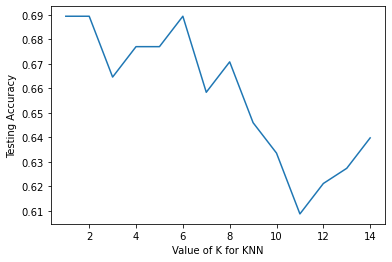

In [795]:
import matplotlib.pyplot as plt

# Choosing the best parameter for KNN
k_range = list(range(1, 15))
scores = []
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(x_train, y_train)
 y_pred_knn = knn.predict(x_test)
 scores.append(metrics.accuracy_score(y_test, y_pred_knn))
    
# Plotting the best parameter
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [796]:
# Training model
knn = KNeighborsClassifier(n_neighbors = 5)
model = knn.fit(x_train,y_train)

In [797]:
# save model ke pickle

pickle.dump(model,open('D:/orbit_future_academy/Proyek Akhir/model/knn_k5_new.pkl','wb'))

In [798]:
y_pred_knn = knn.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [799]:
np.array(y_test)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0], dtype=int64)

## Logistic Regression

In [800]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [801]:
# Training model
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

In [802]:
# save model ke pickle

pickle.dump(model,open('D:/orbit_future_academy/Proyek Akhir/model/log_reg_new.pkl','wb'))

In [803]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [804]:
np.array(y_test)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0], dtype=int64)

## Random forest

In [805]:
from sklearn.ensemble import RandomForestClassifier

In [806]:
# Training model
rf = RandomForestClassifier()
model = rf.fit(x_train,y_train)

In [807]:
# save model ke pickle

pickle.dump(model,open('D:/orbit_future_academy/Proyek Akhir/model/random_forest_new.pkl','wb'))

In [808]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [809]:
np.array(y_test)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0], dtype=int64)

# model evaluation

In [810]:
from sklearn import metrics

print('Akurasi Naive Bayes:',metrics.accuracy_score(y_test,y_pred_nb))
print('Akurasi KNN:',metrics.accuracy_score(y_test,y_pred_knn))
print('Akurasi Logistic Regression:',metrics.accuracy_score(y_test,y_pred_lr))
print('Akurasi Random Forest:',metrics.accuracy_score(y_test,y_pred_rf))

Akurasi Naive Bayes: 0.8074534161490683
Akurasi KNN: 0.6770186335403726
Akurasi Logistic Regression: 0.6770186335403726
Akurasi Random Forest: 0.7639751552795031


In [811]:
# evaluasi dengan MSE
from sklearn.metrics import mean_squared_error

print('MSE Naive Bayes:',mean_squared_error(y_test,y_pred_nb))
print('MSE KNN:',mean_squared_error(y_test,y_pred_knn))
print('MSE Logistic Regression:',mean_squared_error(y_test,y_pred_lr))
print('MSE Random Forest:',mean_squared_error(y_test,y_pred_rf))

MSE Naive Bayes: 0.19254658385093168
MSE KNN: 0.32298136645962733
MSE Logistic Regression: 0.32298136645962733
MSE Random Forest: 0.2360248447204969


In [814]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        62
           1       0.80      0.92      0.85        99

    accuracy                           0.81       161
   macro avg       0.81      0.77      0.79       161
weighted avg       0.81      0.81      0.80       161



In [815]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(text_algorithm,x_train,y_train))

[0.77333333 0.77333333 0.74666667 0.82432432 0.75675676]


# Deployment

In [813]:
import pickle
from joblib import load
#Hasil
file = pickle.load(open('D:/orbit_future_academy/Proyek Akhir/model/bernoulli_nb.pkl','rb'))

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing(data_input)
print('')
print('hasil preprocessing:\n',data_input,'\n')

#Load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("D:/orbit_future_academy/Proyek Akhir/other/naive-bayes-model/selected_features.pkl", "rb"))))

hasil = file.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==0):
    s ="Valid"
else:
    s ="Hoax"
    
print("Hasil prediksi:\n", s) 

Masukkan sentiment:
Batang - Presiden Joko Widodo (Jokowi) melakukan kunjungan kerja ke Batang, Jawa Tengah, hari ini. Selain meninjau Kawasan Industri Terpadu (KIT), Jokowi juga menghadiri acara Syukuran Hasil Bumi Gerakan Masyarakat (Gema) Perhutanan Sosial di dusun Cepoko, Desa Tumbrep, Kecamatan Bandar. Di sela kunjungannya itu, Jokowi memberikan tugas khusus untuk dua pejabat yang menyertainya dalam acara itu. Yakni kepada Menteri BUMN Erick Thohir dan Gubernur Jawa Tengah Ganjar Pranowo yakni tentang pendampingan bagi masyarakat tentang pemanfaatan lahan.  "Nah, tolong ini dicatat Pak Menteri BUMN, Pak Erick Thohir ini dicatat, yang dibutuhkan itu apa. Karena pak menteri pertanian tidak hadir, sehingga Pak Erick lebih punya power mungkin dibanding menteri pertanian," kata Jokowi, Rabu (8/6/2022).  "Yang kedua di sini kan juga ada Pak Gubernur (Ganjar Pranowo), saya minta juga para petani diperhatikan sarana prasarana, betul? Setuju mboten?," kata Jokowi disambut tepuk tangan peta

In [684]:
"""df = pd.read_excel('D:/orbit_future_academy/Proyek Akhir/Dataset/data_coba.xlsx',sheet_name='Sheet2')
file = pickle.load(open('D:/orbit_future_academy/Proyek Akhir/model/bernoulli_nb_1500.pkl','rb'))
list_label = []

for i in range(len(df.berita)):
    data_input = text_preprocessing(df.berita[i])
    
    tfidf = TfidfVectorizer
    loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("D:/orbit_future_academy/Proyek Akhir/other/naive-bayes-model/selected_features_1500.pkl", "rb"))))
    hasil = file.predict(loaded_vec.fit_transform([data_input]))
    
    if(hasil==0):
        list_label.append('valid')
    else:
        list_label.append('Hoax')"""

'df = pd.read_excel(\'D:/orbit_future_academy/Proyek Akhir/Dataset/data_coba.xlsx\',sheet_name=\'Sheet2\')\nfile = pickle.load(open(\'D:/orbit_future_academy/Proyek Akhir/model/bernoulli_nb_1500.pkl\',\'rb\'))\nlist_label = []\n\nfor i in range(len(df.berita)):\n    data_input = text_preprocessing(df.berita[i])\n    \n    tfidf = TfidfVectorizer\n    loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("D:/orbit_future_academy/Proyek Akhir/other/naive-bayes-model/selected_features_1500.pkl", "rb"))))\n    hasil = file.predict(loaded_vec.fit_transform([data_input]))\n    \n    if(hasil==0):\n        list_label.append(\'valid\')\n    else:\n        list_label.append(\'Hoax\')'

In [685]:
"""df['label_tes'] = list_label"""

"df['label_tes'] = list_label"